<style>
h1{color: rgb(255, 26, 26); background-color: rgb(0, 255, 255);}
</style>
<h1><b> IN THIS PROJECT WE ARE GOING TO PREDICT AIR QUALITY INDEX.</b></h1>

## What is Air Pollution? ##

<ol>
Air pollution is nothing but, increase of toxic and harmful material in the air, resulting in contamination of air. These material may be in form of solid, liquid or gaseous substances and released in air due to various activities by human beings causing an adverse effect to natural life.
</ol>

## How does Air Pollution affect the capital of India? ##

<ol>
The air quality in Delhi, the capital territory of India, according to a WHO survey of 1,650 world cities, and a survey of 7,000 world cities by the US-based Health Effects Institute in August 2022, is the worst of any major city in the world. It also affects the districts around Delhi. Air pollution in India is estimated to kill about 2 million people every year; it is the fifth largest killer in India. India has the world's highest death rate from chronic respiratory diseases and asthma, according to the WHO. In Delhi, poor quality air irreversibly damages the lungs of 2.2 million or 50 percent of all children.
</ol>

## <b> Causes of poor air quality: </b> ##

<ol>
<li> Emissions from Industries and Factories.</li>
<li> The Use of Firecrackers. </li>
<li> Emissions from Construction Sites. </li>
<li> Over-Population. </li>
<li> Emission from Transportation and Motorised Vehicles. </li>
<li> Stubble Burning in Agricultural Sector. </li>
</ol>

## Building A Model to Predict AQI ##

### We need to import requred Libraries ###

In [1]:
# Importing the required libraries

# for data preprocessing and working with csv
import pandas as pd

# for linear algebra
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# for linear regression analysis
from sklearn.linear_model import LinearRegression

# for data splitting
from sklearn.model_selection import train_test_split
# for model validation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# for display image
from IPython.display import Image

## According to Air Quality Index (AQI) ##

### Delhi Average Air Quality: ###

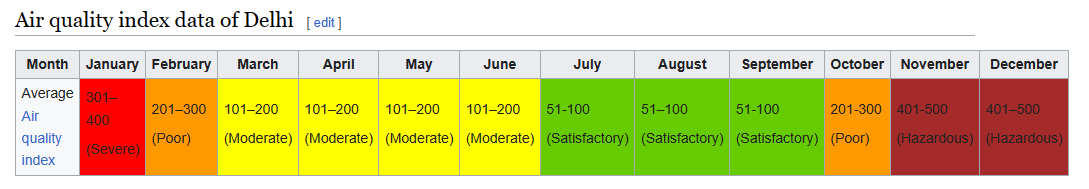

In [2]:
Image('..\Images\AQI Delhi.png')

## We want to calculate AQI  ##

For this study we need help of variours data sets.
Our goal is to Achieve AQI of Delhi.

### Importing Delhi Air Quality Data from a Csv File ###

In [3]:
# Reading Data to a Pandas Data Frame
Delhi_AQ = pd.read_csv('..\Cities Data\delhi_aqi.csv')

In [4]:
# Printing 1st five rows
Delhi_AQ.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


### Summary of Data Frame ###

In [5]:
Delhi_AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Looks like there are no null values in our Data Frame. Let's check further :-

### Column wise total null values ###

In [6]:
Delhi_AQ.isna().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

### Checking Duplicate Values ###

In [7]:
Delhi_AQ[Delhi_AQ.duplicated()]

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3


Ok. We don't have any Duplicate values.

## Let's understand the Data Frame ##

### 1st 23 rows Printed ###

In [8]:
Delhi_AQ.iloc[:24]

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
5,2020-11-25 06:00:00,3898.62,28.39,117.90,40.05,101.09,437.25,511.79,42.05
6,2020-11-25 07:00:00,1949.31,14.53,105.56,83.69,185.01,312.76,349.20,12.79
7,2020-11-25 08:00:00,1508.71,11.62,112.41,87.98,217.44,275.53,303.47,6.59
8,2020-11-25 09:00:00,1361.85,7.04,109.67,95.84,213.62,263.51,289.86,6.02
9,2020-11-25 10:00:00,1602.17,3.10,93.22,104.43,152.59,271.25,302.27,12.16


Ok, it's look like hourly data.

### Converting to Pandas Date Time ###

In [9]:
Delhi_AQ['date'] = pd.to_datetime(Delhi_AQ['date'])

### Sorting the Data as a Time Series ###

In [10]:
Delhi_AQ.sort_values(by='date', inplace=True)

### Checking Statistics ###

In [11]:
Delhi_AQ.describe()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2021-12-23 14:35:34.384320256,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
min,2020-11-25 01:00:00,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,2021-06-09 14:45:00,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,2021-12-22 04:30:00,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,2022-07-07 18:15:00,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,2023-01-24 08:00:00,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000
std,NaN,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108


## Checking Outliers ##

### Carbon Monoxide Column ###

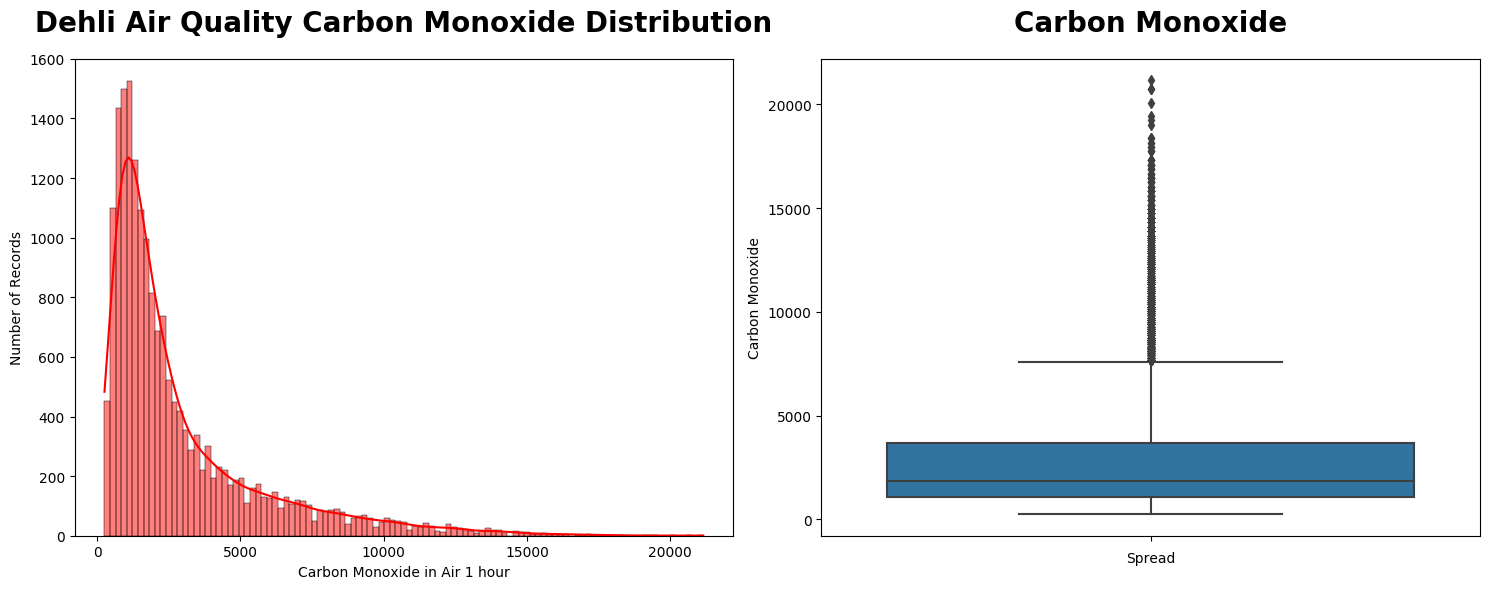

In [12]:
plt.figure(figsize=(15, 6))
plt.style.use('_classic_test_patch')
plt.subplot(1,2,1)
sns.histplot(Delhi_AQ['co'], color="red", kde=True)
plt.title("Dehli Air Quality Carbon Monoxide Distribution", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Number of Records')
plt.xlabel('Carbon Monoxide in Air 1 hour')
plt.subplot(1,2,2)
sns.boxplot(y=Delhi_AQ['co'])
plt.title("Carbon Monoxide", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Carbon Monoxide')
plt.xlabel('Spread')
plt.tight_layout()

plt.show()
plt.close()

### Nitrogen Monoxide Column ###

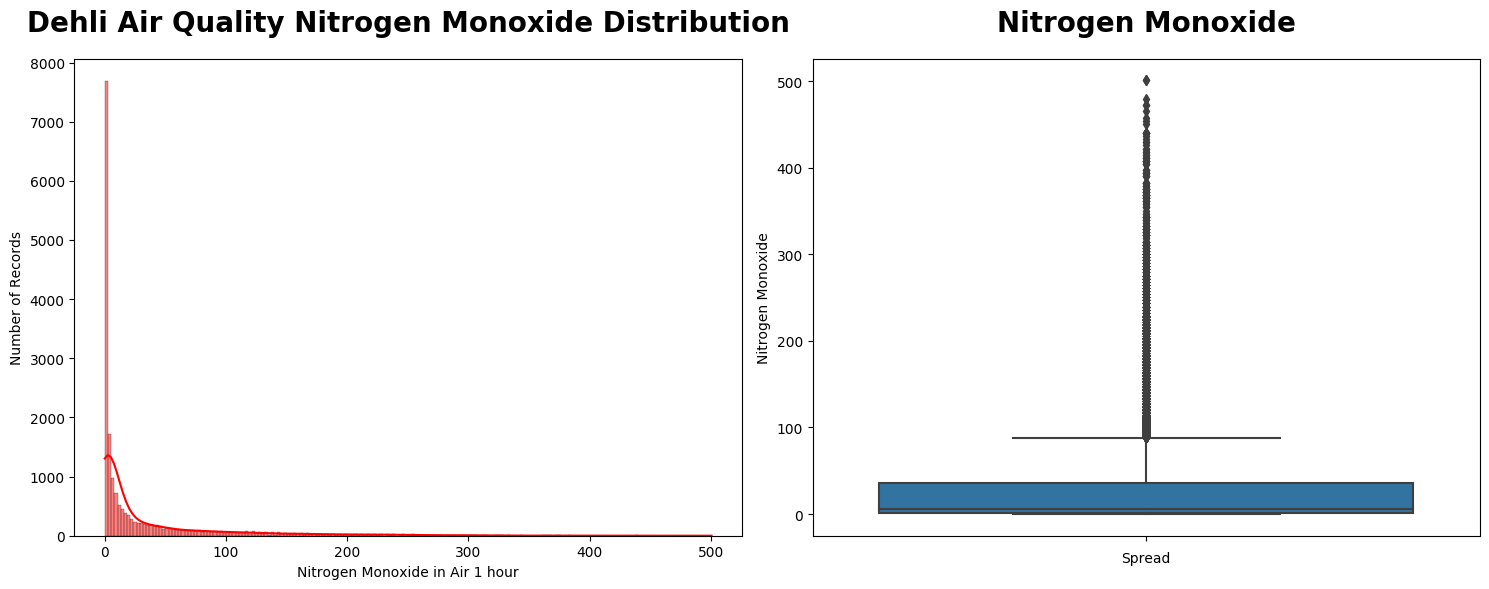

In [13]:
plt.figure(figsize=(15, 6))
plt.style.use('_classic_test_patch')
plt.subplot(1,2,1)
sns.histplot(Delhi_AQ['no'], color="red", kde=True)
plt.title("Dehli Air Quality Nitrogen Monoxide Distribution", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Number of Records')
plt.xlabel('Nitrogen Monoxide in Air 1 hour')
plt.subplot(1,2,2)
sns.boxplot(y=Delhi_AQ['no'])
plt.title("Nitrogen Monoxide", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Nitrogen Monoxide')
plt.xlabel('Spread')
plt.tight_layout()

plt.show()
plt.close()

### Nitrogen Dioxide Column ###

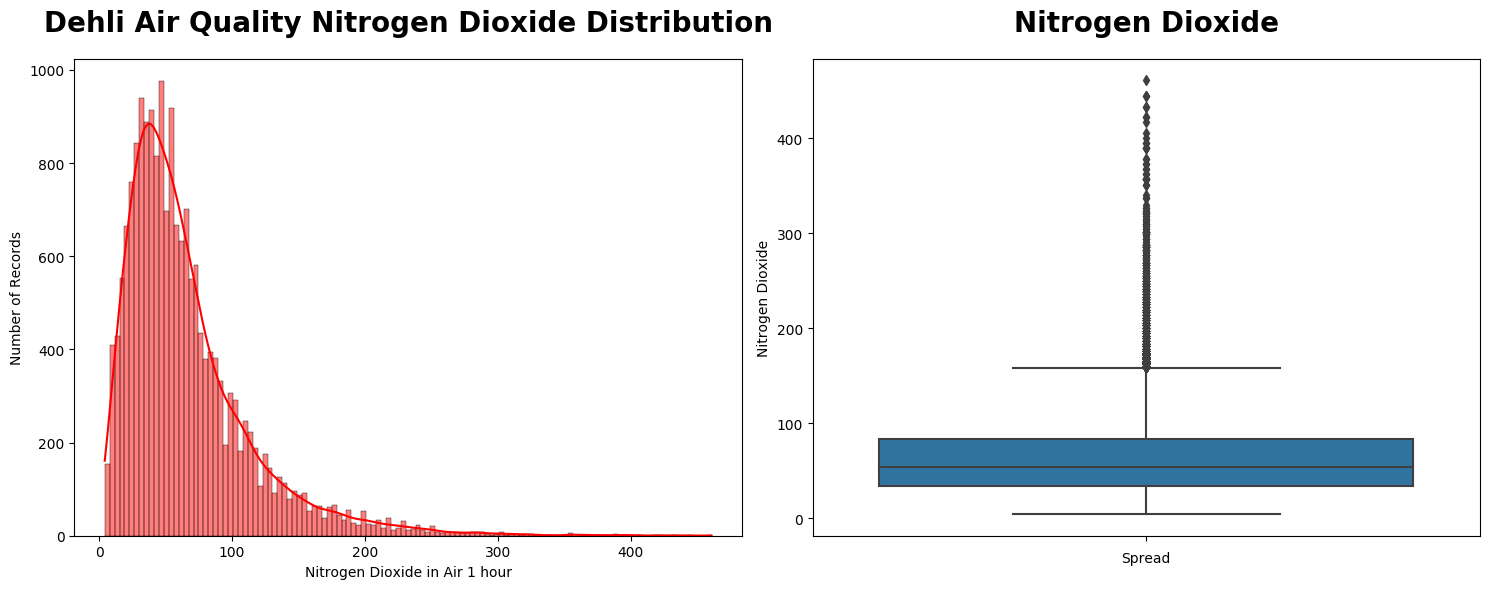

In [14]:
plt.figure(figsize=(15, 6))
plt.style.use('_classic_test_patch')
plt.subplot(1,2,1)
sns.histplot(Delhi_AQ['no2'], color="red", kde=True)
plt.title("Dehli Air Quality Nitrogen Dioxide Distribution", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Number of Records')
plt.xlabel('Nitrogen Dioxide in Air 1 hour')
plt.subplot(1,2,2)
sns.boxplot(y=Delhi_AQ['no2'])
plt.title("Nitrogen Dioxide", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Nitrogen Dioxide')
plt.xlabel('Spread')
plt.tight_layout()

plt.show()
plt.close()

### Ground-level ozone (O3) Column ###

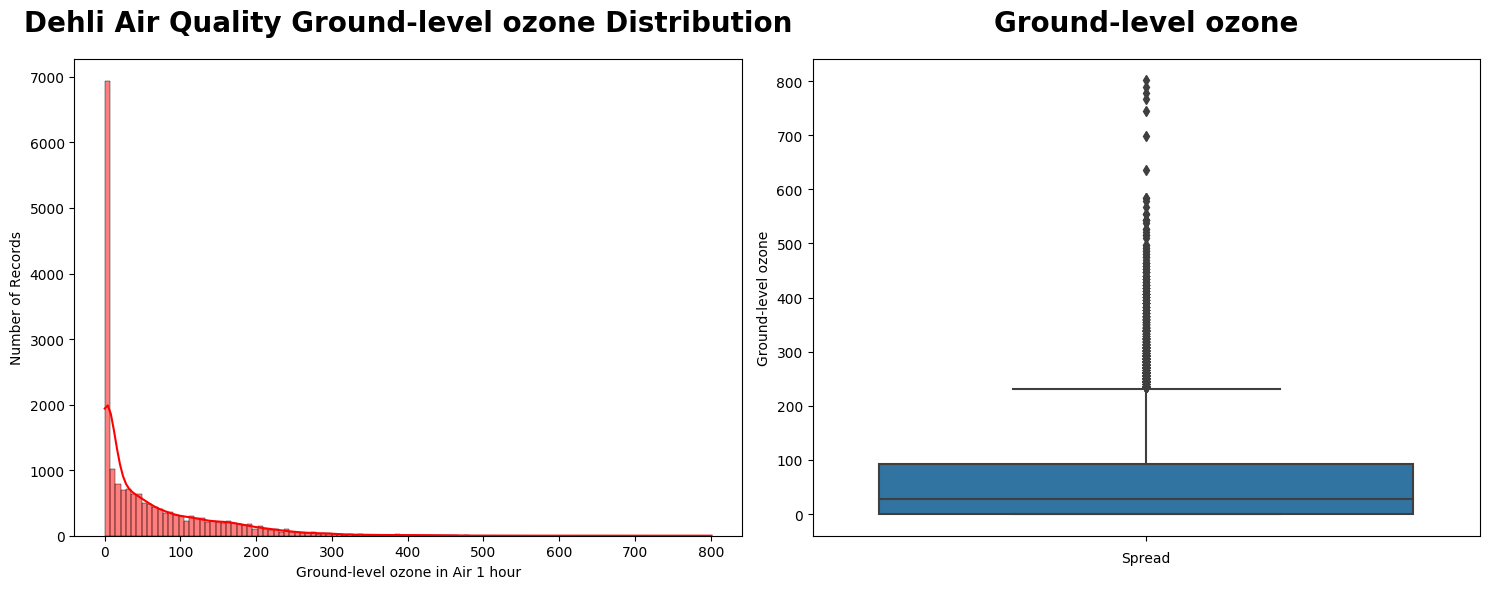

In [15]:
plt.figure(figsize=(15, 6))
plt.style.use('_classic_test_patch')
plt.subplot(1,2,1)
sns.histplot(Delhi_AQ['o3'], color="red", kde=True)
plt.title("Dehli Air Quality Ground-level ozone Distribution", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Number of Records')
plt.xlabel('Ground-level ozone in Air 1 hour')
plt.subplot(1,2,2)
sns.boxplot(y=Delhi_AQ['o3'])
plt.title("Ground-level ozone", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Ground-level ozone')
plt.xlabel('Spread')
plt.tight_layout()

plt.show()
plt.close()

### Sulfur Dioxide Column ###

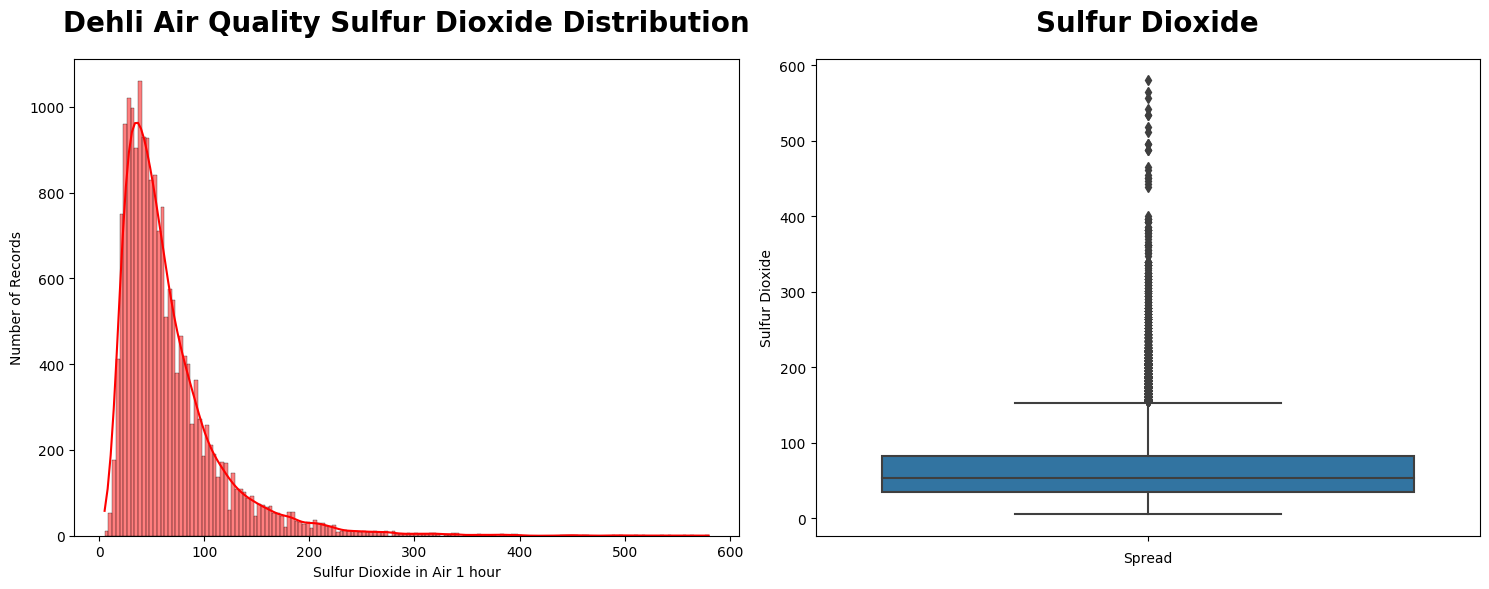

In [16]:
plt.figure(figsize=(15, 6))
plt.style.use('_classic_test_patch')
plt.subplot(1,2,1)
sns.histplot(Delhi_AQ['so2'], color="red", kde=True)
plt.title("Dehli Air Quality Sulfur Dioxide Distribution", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Number of Records')
plt.xlabel('Sulfur Dioxide in Air 1 hour')
plt.subplot(1,2,2)
sns.boxplot(y=Delhi_AQ['so2'])
plt.title("Sulfur Dioxide", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Sulfur Dioxide')
plt.xlabel('Spread')
plt.tight_layout()

plt.show()
plt.close()

### PM 2.5 Column ###

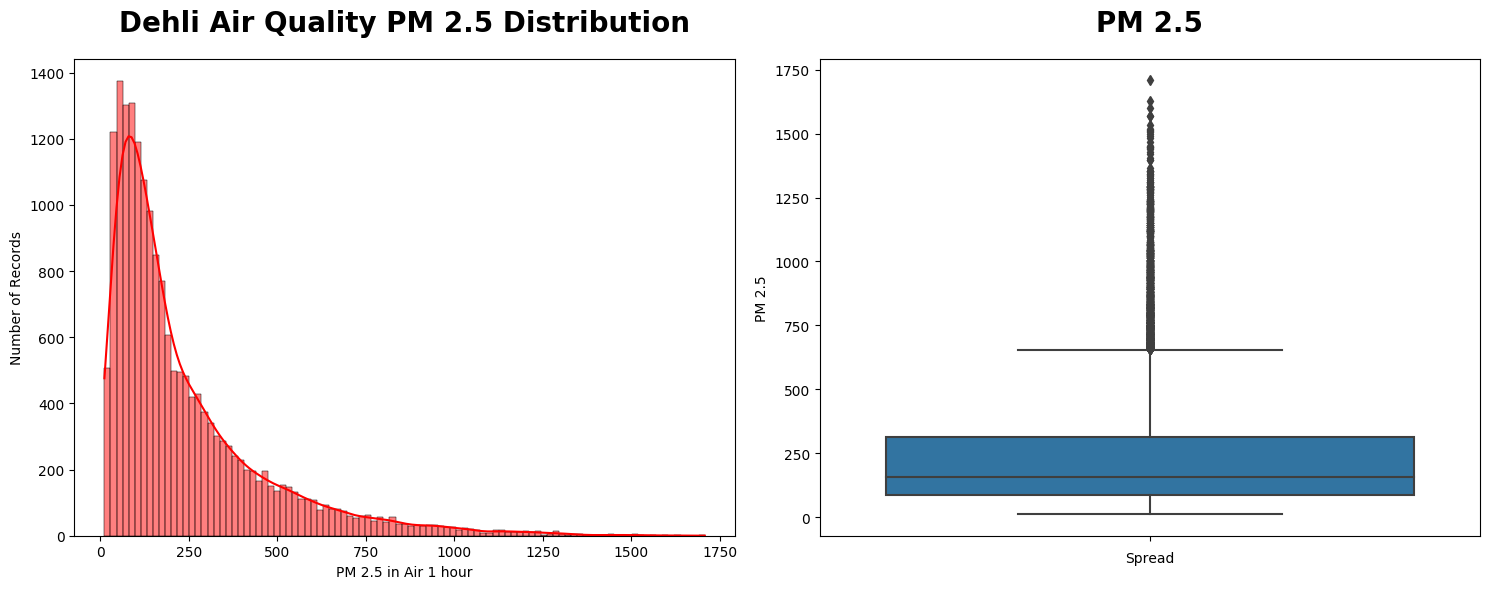

In [17]:
plt.figure(figsize=(15, 6))
plt.style.use('_classic_test_patch')
plt.subplot(1,2,1)
sns.histplot(Delhi_AQ['pm2_5'], color="red", kde=True)
plt.title("Dehli Air Quality PM 2.5 Distribution", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Number of Records')
plt.xlabel('PM 2.5 in Air 1 hour')
plt.subplot(1,2,2)
sns.boxplot(y=Delhi_AQ['pm2_5'])
plt.title("PM 2.5", fontweight="black", pad=20, fontsize=20)
plt.ylabel('PM 2.5')
plt.xlabel('Spread')
plt.tight_layout()

plt.show()
plt.close()

### PM 10 Column ###

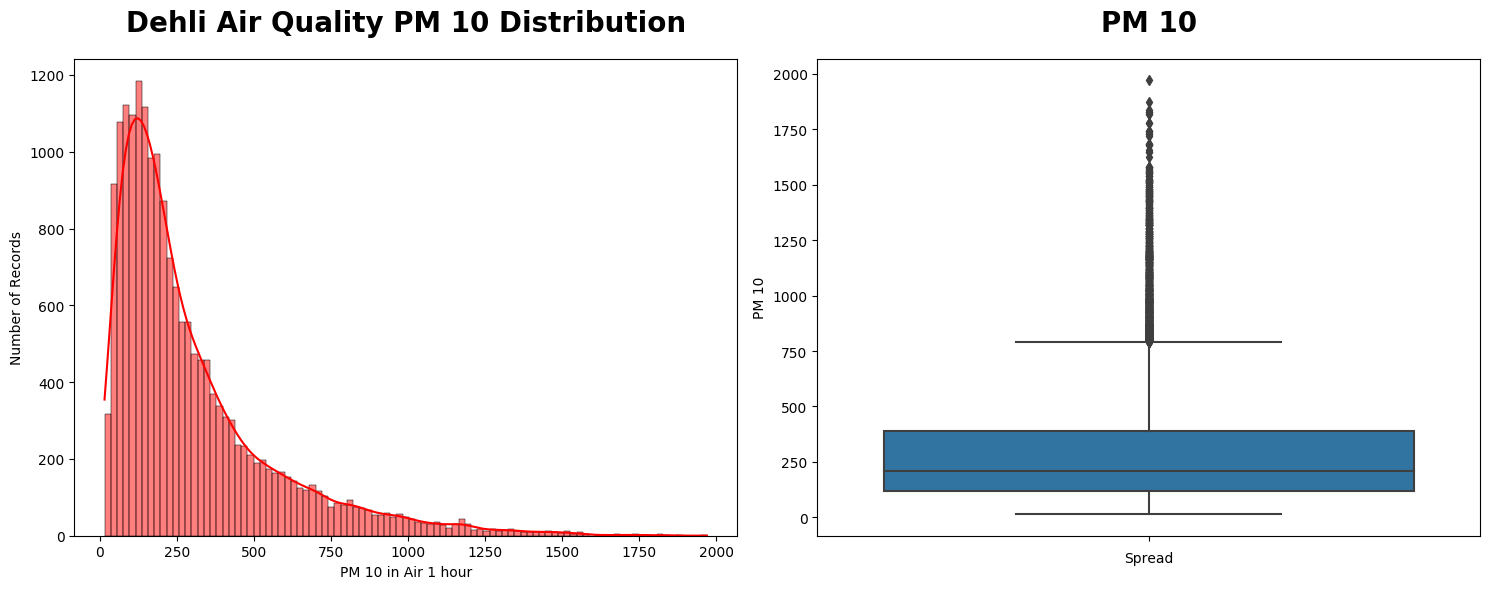

In [18]:
plt.figure(figsize=(15, 6))
plt.style.use('_classic_test_patch')
plt.subplot(1,2,1)
sns.histplot(Delhi_AQ['pm10'], color="red", kde=True)
plt.title("Dehli Air Quality PM 10 Distribution", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Number of Records')
plt.xlabel('PM 10 in Air 1 hour')
plt.subplot(1,2,2)
sns.boxplot(y=Delhi_AQ['pm10'])
plt.title("PM 10", fontweight="black", pad=20, fontsize=20)
plt.ylabel('PM 10')
plt.xlabel('Spread')
plt.tight_layout()

plt.show()
plt.close()

### Ammonia Pollution Column ###

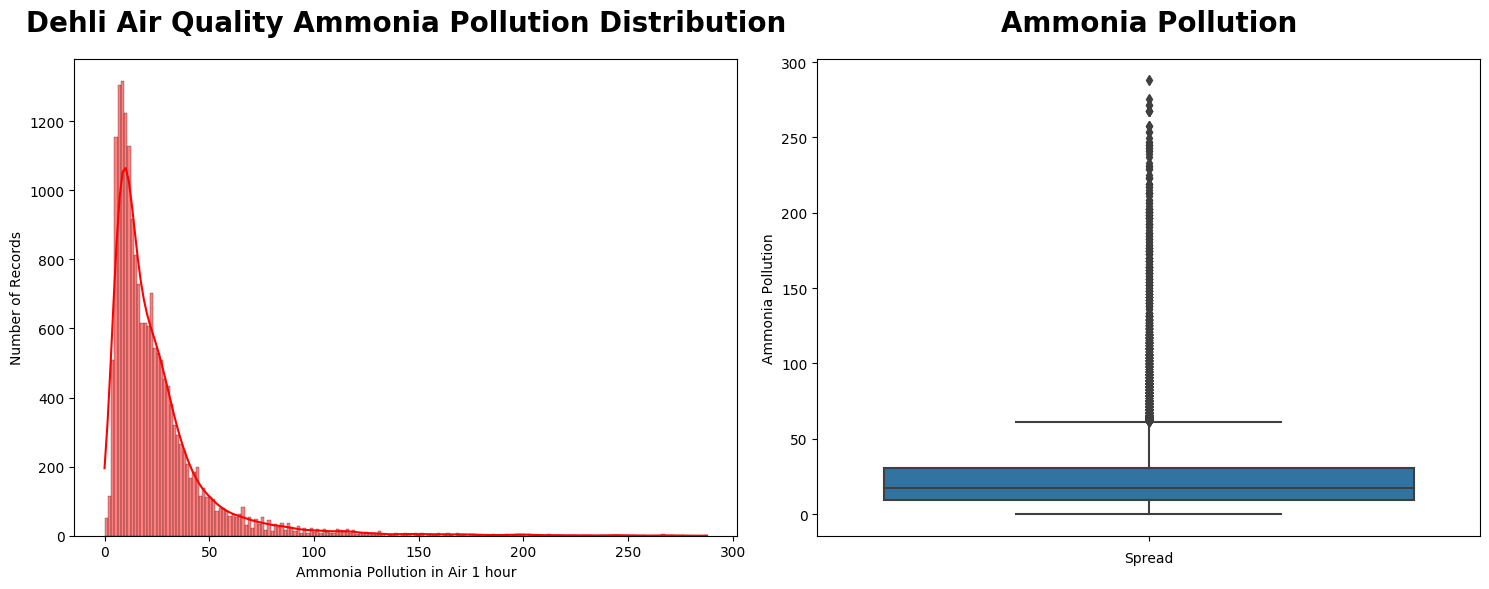

In [19]:
plt.figure(figsize=(15, 6))
plt.style.use('_classic_test_patch')
plt.subplot(1,2,1)
sns.histplot(Delhi_AQ['nh3'], color="red", kde=True)
plt.title("Dehli Air Quality Ammonia Pollution Distribution", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Number of Records')
plt.xlabel('Ammonia Pollution in Air 1 hour')
plt.subplot(1,2,2)
sns.boxplot(y=Delhi_AQ['nh3'])
plt.title("Ammonia Pollution", fontweight="black", pad=20, fontsize=20)
plt.ylabel('Ammonia Pollution')
plt.xlabel('Spread')
plt.tight_layout()

plt.show()
plt.close()

### Conclusion ###

<ol>
We have lots of Outliers in Each column we need to remove those column.
</ol>

## Formula to Remove Outliers ##

### Formula in Python ###

In [20]:
def remove_outlier_indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return trueList

### Applying Outlier Removal Formula (IQR Method) ###

In [21]:
Delhi_AQ = Delhi_AQ[Delhi_AQ.apply(lambda x: remove_outlier_indices(x))]

# Now, we need some basic knowledge about, how can we prepare Air Quality Index :- #

## What is Air Quality Index? ##

<ol>
The National Air Quality Index (AQI) was launched in New Delhi on September 17, 2014, under the Swachh Bharat Abhiyan.
</ol>

<ol>
There are six AQI categories, namely Good, Satisfactory, Moderate, Poor, Severe, and Hazardous. The proposed AQI will consider eight pollutants (PM10, PM2.5, NO2, SO2, CO, O3, NH3, and Pb) for which short-term (up to 24-hourly averaging period) National Ambient Air Quality Standards are prescribed. Based on the measured ambient concentrations, corresponding standards and likely health impact, a sub-index is calculated for each of these pollutants. The worst sub-index reflects overall AQI. Likely health impacts for different AQI categories and pollutants have also been suggested, with primary inputs from the medical experts in the group. The AQI values and corresponding ambient concentrations (health breakpoints) as well as associated likely health impacts for the identified eight pollutants are as follows:
</ol>

### AQI Category, Pollutants and Health Breakpoints ###

National Ambient Air Quality Standards are prescribed.

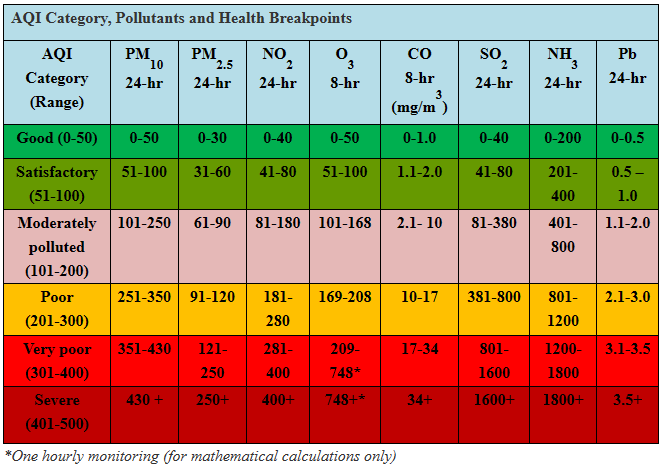

In [22]:
Image('..\Images\Goverment Standarts.png')

### Impact on Health ###

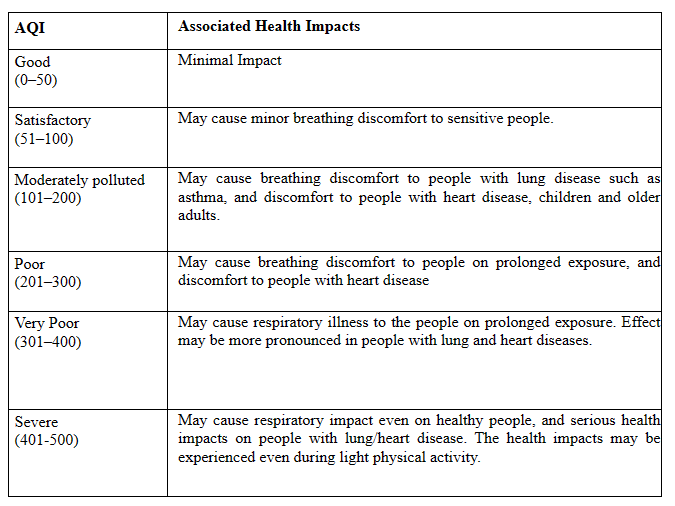

In [23]:
Image('..\Images\Impact of AQI.png')

### Python code For AQI category ###

In [24]:
def aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    elif aqi <= 500:
        return "Severe"
    elif aqi > 500:
        return "Hazardous"
    else:
        return np.NaN

#### Conclusion ####

<ol>
<li> We need to create subindexes, in order to prepare <i> Air Quality Index </i>. </li>
<li> The subindex we prepare will be based on PM10, PM2.5, NO2, SO2, CO, O3, NH3, and Pb. </li>
<li> The subindex will be in 24 or 8 hour period in respect of Category. </li>
<li> Then we apply Indian Government prescribed standards. </li>
</ol>

## Calculation of Air Quality Index ##

### Government of India Instructions ###

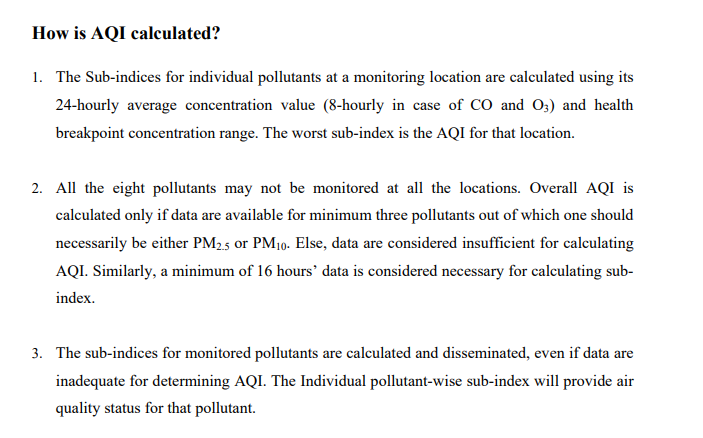

In [25]:
Image('..\Images\Government Instruction.png')

### Considering Three columns to Calculate AQI which are O3, PM2.5 and PM10 ###

In [26]:
def aqi_col_cal(df):
    # Defining O3, Pm2.5 and PM10 Columns
    co = df[['O3_Index', 'PM2.5_Index', 'PM10_Index']]

    # Empty List
    aqi_list = []

    # Loop for Iterate each Rows
    for i in range(len(co)):

        # Varible to store each Row values
        index_aq_val = co.iloc[i]

        # Storing each row highest value is consider as AQI range as Goverment Prescribed
        aqi = index_aq_val.max()

        # Storing AQI values into a List
        aqi_list.append(aqi)
    
    # All Air Quality Index Values Return to a List
    return aqi_list

### <b> Formula </b> ###

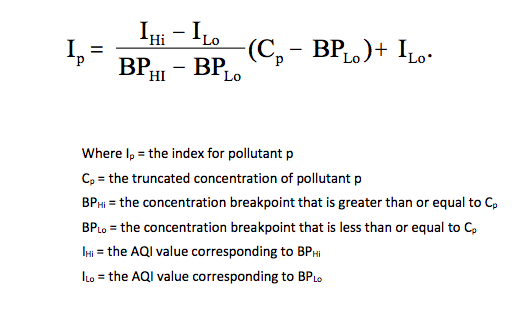

In [27]:
Image('..\Images\AQI Formula.png')

### Python code of AQI formula ###

In [28]:
def calculate_aqi(Cp, Ih, Il, BPh, BPl):
    """
    Calculate the AQI for a given pollutant concentration.
    
    Args:
        Cp: The pollutant concentration.
        Ih: The AQI value corresponding to BPh.
        Il: The AQI value corresponding to BPl.
        BPh: The breakpoint that is greater than or equal to Cp.
        BPl: The breakpoint that is less than or equal to Cp.
    
    Returns:
        The AQI value corresponding to Cp.
    """
    aqi = ((Ih - Il) / (BPh - BPl)) * (Cp - BPl) + Il
    return aqi

### Python code of AQI Formula Beyond Limit ###

In [29]:
def calculate_aqi_beyond(Cp, Ih, Il, BPl):
    """
    Calculate the AQI for a given pollutant concentration.
    
    Args:
        Cp: The pollutant concentration.
        Ih: The AQI value corresponding to BPh.
        Il: The AQI value corresponding to BPl.
        BPl: The breakpoint that is less than or equal to Cp.
    
    Returns:
        The AQI value corresponding to Cp.
    """
    aqi = ((Ih - Il) / BPl) * (Cp - BPl) + Il
    return aqi

### <i> <b> Example </b> of Calculation </i> ###

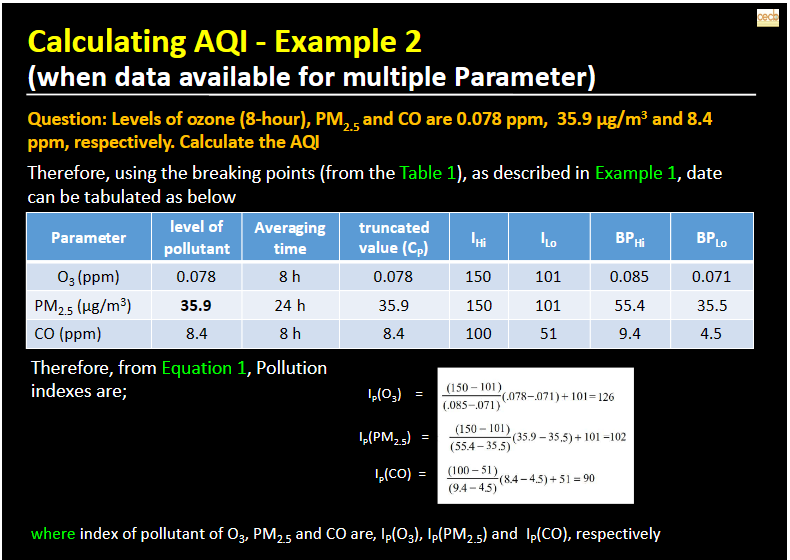

In [30]:
Image('..\Images\Formula Implementation.png')

# Column wise <b> Description </b> and <b> Formula </b> application #

## Creating two New Data Frames to proceed further ##

### Averaging all the Data in prescribed formula. 24 hours 8 hours mean will be calculated based on Data ###

In [31]:
AQ_Avg = pd.DataFrame()

### Apllying Indian Government Prescribed Standrads to Prepare Air Quality Index :- ###

In [32]:
AQI = pd.DataFrame()

## What is CO? ##

<ol>
Carbon Monoxide (CO) is a colorless, odorless gas that can be harmful when inhaled in large amounts. It is released when something is burned and the greatest sources of CO to outdoor air are cars, trucks and other vehicles or machinery that burn fossil fuels.
</ol>
<ol>
CO plays a major role in atmospheric chemistry and affects the ability of the atmosphere to cleanse itself of many other polluting gases. In combination with other pollutants and sunshine, it also takes part in the formation of lower-atmospheric (“bad”) ozone and urban smog.
</ol>

### Averaging CO with Range of 8 hour :- ###

In [33]:
AQ_Avg['CO_8Hour_Avg'] = Delhi_AQ['co'].rolling(window=8, min_periods=8).mean()

### <b> CO </b> Subindex calculation ###

In [34]:
def co_subindex(df):
    # Defining Carbon Monoxide 8 hour Average Column
    co = df['CO_8Hour_Avg']

    # Empty List
    aqi_list = []

    # Loop for Iterate each Rows
    for i in range(len(co)):

        # Varible to store each Row values
        avg_aq_val = co.iloc[i]

        # Conditions to Calculate AQI range in Respective Rows
        # Using Calculate AQI Funtion to get AQI value
        
        # 1st Condition : AQI Range GOOD
        if (avg_aq_val >= 0 and avg_aq_val <= 1.0):
            cal_aqi = calculate_aqi(avg_aq_val, 50, 0, 1.0, 0)
            aqi_list.append(cal_aqi)
        
        # 2nd Condition : AQI Range Satisfactory
        elif (avg_aq_val >= 1.1 and avg_aq_val <= 2.0):
            cal_aqi = calculate_aqi(avg_aq_val, 100, 51, 2.0, 1.1)
            aqi_list.append(cal_aqi)
        
        # 3rd Condition : AQI Range Moderate
        elif (avg_aq_val >= 2.1 and avg_aq_val <= 10):
            cal_aqi = calculate_aqi(avg_aq_val, 200, 101, 10, 2.1)
            aqi_list.append(cal_aqi)
        
        # 4th Condition : AQI Range Poor
        elif (avg_aq_val >= 10 and avg_aq_val <= 17):
            cal_aqi = calculate_aqi(avg_aq_val, 300, 201, 17, 10)
            aqi_list.append(cal_aqi)
        
        # 5th Condition : AQI Range Severe
        elif (avg_aq_val >= 17 and avg_aq_val <= 34):
            cal_aqi = calculate_aqi(avg_aq_val, 400, 301, 34, 17)
            aqi_list.append(cal_aqi)
        
        # 6th Condition : AQI Range Hazardous
        elif (avg_aq_val >= 34):
            
            # In the Series Taking maximum value to Calculate Index
            cal_aqi = calculate_aqi_beyond(avg_aq_val, 500, 401, 34)
            aqi_list.append(cal_aqi)
        
        # 7th Condition : In case of missing
        else:
            cal_aqi = np.nan
            aqi_list.append(cal_aqi)
    
    # All Air Quality Index Values Return to a List
    return aqi_list

### Apllying CO Index values to Prepare Air Quality Index ###

In [35]:
AQI['CO_Index'] = co_subindex(AQ_Avg)

## What is NO? ##

<ol>
Nitrogen monoxide (NO) also called nitric oxide, is a chemical compound with the chemical formula NO that appears as a colorless gas with a sharp, sweet odor. Although known as a toxic air pollutant, NO also has many important functions in the human body.
</ol>
<ol>
Nitric oxide can be produced by lightning strikes, where the rapid heating and cooling of the gases within a lightning bolt produces nitric oxide (NO), which combines with oxygen to create nitrogen dioxide (NO).
</ol>

### Averaging NO with Range of 24 hours :- ###

In [36]:
AQ_Avg['NO_24Hour_Avg'] = Delhi_AQ['no'].rolling(window=24).mean()

<ol>
<B> We don't need to Calculate SubIndex for NO (Nitrogen monoxide) Column. </b>
</ol>
<ol>
Because as per Indian Government we need PM10, PM2.5, NO2, SO2, CO, O3, NH3, and Pb these Data. Where No is not included.
</ol>

## What is NO2? ##

<ol>
Nitrogen Dioxide (NO2) is part of a group of gaseous air pollutants produced as a result of road traffic and other fossil fuel combustion processes. Its presence in air contributes to the formation and modification of other air pollutants, such as ozone and particulate matter, and to acid rain.
</ol>
<ol>
Exposure to NO2 can irritate airways and aggravate respiratory diseases. NO2 is an important ozone precursor, a pollutant closely linked to asthma and other respiratory conditions.
</ol>

### Averaging NO2 with Range of 24 with condition Minimum 16 hours :- ###

In [37]:
AQ_Avg['NO2_24Hour_Avg'] = Delhi_AQ['no2'].rolling(window=24, min_periods=16).mean()

### <b> NO2 </b> Subindex calculation ###

In [38]:
def no2_subindex(df):
    # Defining NO2 24 hour Average Column
    co = df['NO2_24Hour_Avg']

    # Empty List
    aqi_list = []

    # Loop for Iterate each Rows
    for i in range(len(co)):

        # Varible to store each Row values
        avg_aq_val = co.iloc[i]

        # Conditions to Calculate AQI range in Respective Rows
        # Using Calculate AQI Funtion to get AQI value
        
        # 1st Condition : AQI Range GOOD
        if (avg_aq_val >= 0 and avg_aq_val <= 40):
            cal_aqi = calculate_aqi(avg_aq_val, 50, 0, 40, 0)
            aqi_list.append(cal_aqi)
        
        # 2nd Condition : AQI Range Satisfactory
        elif (avg_aq_val >= 41 and avg_aq_val <= 80):
            cal_aqi = calculate_aqi(avg_aq_val, 100, 51, 80, 41)
            aqi_list.append(cal_aqi)
        
        # 3rd Condition : AQI Range Moderate
        elif (avg_aq_val >= 81 and avg_aq_val <= 180):
            cal_aqi = calculate_aqi(avg_aq_val, 200, 101, 180, 81)
            aqi_list.append(cal_aqi)
        
        # 4th Condition : AQI Range Poor
        elif (avg_aq_val >= 181 and avg_aq_val <= 280):
            cal_aqi = calculate_aqi(avg_aq_val, 300, 201, 280, 181)
            aqi_list.append(cal_aqi)
        
        # 5th Condition : AQI Range Severe
        elif (avg_aq_val >= 281 and avg_aq_val <= 400):
            cal_aqi = calculate_aqi(avg_aq_val, 400, 301, 400, 281)
            aqi_list.append(cal_aqi)
        
        # 6th Condition : AQI Range Hazardous
        elif (avg_aq_val >= 400):
            
            # In the Series Taking maximum value to Calculate Index
            cal_aqi = calculate_aqi_beyond(avg_aq_val, 500, 401, 400)
            aqi_list.append(cal_aqi)
        
        # 7th Condition : In case of missing
        else:
            cal_aqi = np.nan
            aqi_list.append(cal_aqi)
    
    # All Air Quality Index Values Return to a List
    return aqi_list

### Apllying NO2 Index values to Prepare Air Quality Index ###

In [39]:
AQI['NO2_Index'] = no2_subindex(AQ_Avg)

## What is O3? ##

<ol>
Ground-level ozone (O3) is a harmful air pollutant that can trigger a variety of health problems, particularly for children, the elderly, and people of all ages who have lung diseases such as asthma. It is the main ingredient in “smog”.
</ol>
<ol>
Ground-level ozone can also harm sensitive vegetation and ecosystems, including forests, parks, wildlife refuges and wilderness areas. In particular, ozone can harm sensitive vegetation during the growing season.
</ol>

### Averaging O3 with Range of 8 hour :- ###

In [40]:
AQ_Avg['O3_8Hour_Avg'] = Delhi_AQ['o3'].rolling(window=8, min_periods=8).mean()

### <b> O3 </b> Subindex calculation ###

In [41]:
def o3_subindex(df):
    # Defining O3 8 hour Average Column
    co = df['O3_8Hour_Avg']

    # Empty List
    aqi_list = []

    # Loop for Iterate each Rows
    for i in range(len(co)):

        # Varible to store each Row values
        avg_aq_val = co.iloc[i]

        # Conditions to Calculate AQI range in Respective Rows
        # Using Calculate AQI Funtion to get AQI value
        
        # 1st Condition : AQI Range GOOD
        if (avg_aq_val >= 0 and avg_aq_val <= 50):
            cal_aqi = calculate_aqi(avg_aq_val, 50, 0, 50, 0)
            aqi_list.append(cal_aqi)
        
        # 2nd Condition : AQI Range Satisfactory
        elif (avg_aq_val >= 51 and avg_aq_val <= 100):
            cal_aqi = calculate_aqi(avg_aq_val, 100, 51, 100, 51)
            aqi_list.append(cal_aqi)
        
        # 3rd Condition : AQI Range Moderate
        elif (avg_aq_val >= 101 and avg_aq_val <= 168):
            cal_aqi = calculate_aqi(avg_aq_val, 200, 101, 168, 101)
            aqi_list.append(cal_aqi)
        
        # 4th Condition : AQI Range Poor
        elif (avg_aq_val >= 169 and avg_aq_val <= 208):
            cal_aqi = calculate_aqi(avg_aq_val, 300, 201, 208, 169)
            aqi_list.append(cal_aqi)
        
        # 5th Condition : AQI Range Severe
        elif (avg_aq_val >= 209 and avg_aq_val <= 748):
            cal_aqi = calculate_aqi(avg_aq_val, 400, 301, 748, 209)
            aqi_list.append(cal_aqi)
        
        # 6th Condition : AQI Range Hazardous
        elif (avg_aq_val >= 748):
            
            # In the Series Taking maximum value to Calculate Index
            cal_aqi = calculate_aqi_beyond(avg_aq_val, 500, 401, 748)
            aqi_list.append(cal_aqi)
        
        # 7th Condition : In case of missing
        else:
            cal_aqi = np.nan
            aqi_list.append(cal_aqi)
    
    # All Air Quality Index Values Return to a List
    return aqi_list

### Apllying O3 Index values to Prepare Air Quality Index ###

In [42]:
AQI['O3_Index'] = o3_subindex(AQ_Avg)

## What is SO2? ##

<ol>
Sulfur dioxide (SO2) is a colorless, reactive air pollutant with a strong odor. When sulfur dioxide combines with water and air, it forms sulfuric acid, which is the main component of acid rain. 
</ol>
<ol>
Sulfur dioxide affects the respiratory system, particularly lung function, and can irritate the eyes. It causes coughing, mucus secretion and aggravates conditions such as asthma and chronic bronchitis.
</ol>

### Averaging SO2 with Range of 24 with condition Minimum 16 hours :- ###

In [43]:
AQ_Avg['SO2_24Hour_Avg'] = Delhi_AQ['so2'].rolling(window=24, min_periods=16).mean()

### <b> SO2 </b> Subindex calculation ###

In [44]:
def so2_subindex(df):
    # Defining SO2 24 hour Average Column
    co = df['SO2_24Hour_Avg']

    # Empty List
    aqi_list = []

    # Loop for Iterate each Rows
    for i in range(len(co)):

        # Varible to store each Row values
        avg_aq_val = co.iloc[i]

        # Conditions to Calculate AQI range in Respective Rows
        # Using Calculate AQI Funtion to get AQI value
        
        # 1st Condition : AQI Range GOOD
        if (avg_aq_val >= 0 and avg_aq_val <= 40):
            cal_aqi = calculate_aqi(avg_aq_val, 50, 0, 40, 0)
            aqi_list.append(cal_aqi)
        
        # 2nd Condition : AQI Range Satisfactory
        elif (avg_aq_val >= 41 and avg_aq_val <= 80):
            cal_aqi = calculate_aqi(avg_aq_val, 100, 51, 80, 41)
            aqi_list.append(cal_aqi)
        
        # 3rd Condition : AQI Range Moderate
        elif (avg_aq_val >= 81 and avg_aq_val <= 380):
            cal_aqi = calculate_aqi(avg_aq_val, 200, 101, 380, 81)
            aqi_list.append(cal_aqi)
        
        # 4th Condition : AQI Range Poor
        elif (avg_aq_val >= 381 and avg_aq_val <= 800):
            cal_aqi = calculate_aqi(avg_aq_val, 300, 201, 800, 381)
            aqi_list.append(cal_aqi)
        
        # 5th Condition : AQI Range Severe
        elif (avg_aq_val >= 801 and avg_aq_val <= 1600):
            cal_aqi = calculate_aqi(avg_aq_val, 400, 301, 1600, 801)
            aqi_list.append(cal_aqi)
        
        # 6th Condition : AQI Range Hazardous
        elif (avg_aq_val >= 1600):
            
            # In the Series Taking maximum value to Calculate Index
            cal_aqi = calculate_aqi_beyond(avg_aq_val, 500, 401, 1600)
            aqi_list.append(cal_aqi)
        
        # 7th Condition : In case of missing
        else:
            cal_aqi = np.nan
            aqi_list.append(cal_aqi)
    
    # All Air Quality Index Values Return to a List
    return aqi_list

### Apllying SO2 Index values to Prepare Air Quality Index ###

In [45]:
AQI['SO2_Index'] = so2_subindex(AQ_Avg)

## What is PM 2.5? ##

<ol>
Particulate matter, or PM2.5, is very small particles in air that are 2.5 micrometers (about 1 ten-thousandth of an inch) or less in diameter. This is less than the thickness of a human hair. Particulate matter, one of six U.S. EPA criteria air pollutants, is a mixture that can include organic chemicals, dust, soot and metals. These particles can come from cars and trucks, factories, wood burning, and other activities.
</ol>
<ol>
PM2.5 is used when describing pollutant levels both outdoor and indoor, where health impact from exposure considers amount of PM2.5 over a 24-hour period. Most studies indicate PM2.5 at or below 12 μg/m 3 is considered healthy with little to no risk from exposure.
</ol>

#### Index values Chart ####

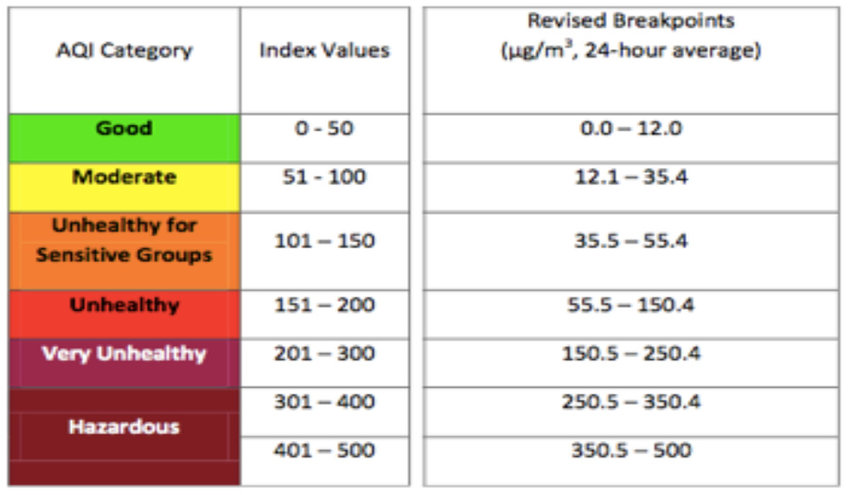

In [46]:
Image('..\Images\PM2.5.png')

### Averaging PM 2.5 with Range of 24 with condition Minimum 16 hours :- ###

In [47]:
AQ_Avg['PM2.5_24Hour_Avg'] = Delhi_AQ['pm2_5'].rolling(window=24, min_periods=16).mean()

### <b> PM 2.5 </b> Subindex calculation ###

In [48]:
def pm25_subindex(df):
    # Defining PM 2.5 24 hour Average Column
    co = df['PM2.5_24Hour_Avg']

    # Empty List
    aqi_list = []

    # Loop for Iterate each Rows
    for i in range(len(co)):

        # Varible to store each Row values
        avg_aq_val = co.iloc[i]

        # Conditions to Calculate AQI range in Respective Rows
        # Using Calculate AQI Funtion to get AQI value
        
        # 1st Condition : AQI Range GOOD
        if (avg_aq_val >= 0 and avg_aq_val <= 30):
            cal_aqi = calculate_aqi(avg_aq_val, 50, 0, 30, 0)
            aqi_list.append(cal_aqi)
        
        # 2nd Condition : AQI Range Satisfactory
        elif (avg_aq_val >= 31 and avg_aq_val <= 60):
            cal_aqi = calculate_aqi(avg_aq_val, 100, 51, 60, 31)
            aqi_list.append(cal_aqi)
        
        # 3rd Condition : AQI Range Moderate
        elif (avg_aq_val >= 61 and avg_aq_val <= 90):
            cal_aqi = calculate_aqi(avg_aq_val, 200, 101, 90, 61)
            aqi_list.append(cal_aqi)
        
        # 4th Condition : AQI Range Poor
        elif (avg_aq_val >= 91 and avg_aq_val <= 120):
            cal_aqi = calculate_aqi(avg_aq_val, 300, 201, 120, 91)
            aqi_list.append(cal_aqi)
        
        # 5th Condition : AQI Range Severe
        elif (avg_aq_val >= 121 and avg_aq_val <= 250):
            cal_aqi = calculate_aqi(avg_aq_val, 400, 301, 250, 121)
            aqi_list.append(cal_aqi)
        
        # 6th Condition : AQI Range Hazardous
        elif (avg_aq_val >= 250):
            
            # In the Series Taking maximum value to Calculate Index
            cal_aqi = calculate_aqi_beyond(avg_aq_val, 500, 401, 250)
            aqi_list.append(cal_aqi)
        
        # 7th Condition : In case of missing
        else:
            cal_aqi = np.nan
            aqi_list.append(cal_aqi)
    
    # All Air Quality Index Values Return to a List
    return aqi_list

### Apllying PM2.5 Index values to Prepare Air Quality Index ###

In [49]:
AQI['PM2.5_Index'] = pm25_subindex(AQ_Avg)

## What is PM 10? ##

<ol>
PM10 particles are inhalable coarse particles with diameters generally 10 micrometers and smaller. When breathed in they penetrate deep into the lungs. Exposure to high concentrations of PM10 can result in a number of health impacts ranging from coughing and wheezing to asthma attacks and bronchitis to high blood pressure, heart attack, strokes and premature death.
</ol>
<ol>
Dust from roads, farms, dry riverbeds, construction sites, and mines are types of PM10.
</ol>

### Averaging PM 10 with Range of 24 with condition Minimum 16 hours :- ###

In [50]:
AQ_Avg['PM10_24Hour_Avg'] = Delhi_AQ['pm10'].rolling(window=24, min_periods=16).mean()

### <b> PM 10 </b> Subindex calculation ###

In [51]:
def pm10_subindex(df):
    # Defining PM 10 24 hour Average Column
    co = df['PM10_24Hour_Avg']

    # Empty List
    aqi_list = []

    # Loop for Iterate each Rows
    for i in range(len(co)):

        # Varible to store each Row values
        avg_aq_val = co.iloc[i]

        # Conditions to Calculate AQI range in Respective Rows
        # Using Calculate AQI Funtion to get AQI value
        
        # 1st Condition : AQI Range GOOD
        if (avg_aq_val >= 0 and avg_aq_val <= 50):
            cal_aqi = calculate_aqi(avg_aq_val, 50, 0, 50, 0)
            aqi_list.append(cal_aqi)
        
        # 2nd Condition : AQI Range Satisfactory
        elif (avg_aq_val >= 51 and avg_aq_val <= 100):
            cal_aqi = calculate_aqi(avg_aq_val, 100, 51, 100, 51)
            aqi_list.append(cal_aqi)
        
        # 3rd Condition : AQI Range Moderate
        elif (avg_aq_val >= 101 and avg_aq_val <= 250):
            cal_aqi = calculate_aqi(avg_aq_val, 200, 101, 250, 101)
            aqi_list.append(cal_aqi)
        
        # 4th Condition : AQI Range Poor
        elif (avg_aq_val >= 251 and avg_aq_val <= 350):
            cal_aqi = calculate_aqi(avg_aq_val, 300, 201, 350, 251)
            aqi_list.append(cal_aqi)
        
        # 5th Condition : AQI Range Severe
        elif (avg_aq_val >= 351 and avg_aq_val <= 430):
            cal_aqi = calculate_aqi(avg_aq_val, 400, 301, 430, 351)
            aqi_list.append(cal_aqi)
        
        # 6th Condition : AQI Range Hazardous
        elif (avg_aq_val >= 430):
            
            # In the Series Taking maximum value to Calculate Index
            cal_aqi = calculate_aqi_beyond(avg_aq_val, 500, 401, 430)
            aqi_list.append(cal_aqi)
        
        # 7th Condition : In case of missing
        else:
            cal_aqi = np.nan
            aqi_list.append(cal_aqi)
    
    # All Air Quality Index Values Return to a List
    return aqi_list

### Apllying PM 10 Index values to Prepare Air Quality Index ###

In [52]:
AQI['PM10_Index'] = pm10_subindex(AQ_Avg)

## What is NH3? ##

<ol>
Ammonia (NH3) is a colorless gas with a pungent odor. NH3 emissions contribute to international transboundary air pollutant issues addressed by the UNECE Convention on Long Range Transboundary Pollution.
</ol>
<ol>
Atmospheric NH3 can react rapidly with acid gases (e.g., SO2 and NO2) into ammonium salts ((NH4)2SO4 and NH4NO3), which has adverse impacts on regional and global air quality, human health, and climate change.
</ol>

### Averaging NH3 with Range of 24 with condition Minimum 16 hours :- ###

In [53]:
AQ_Avg['NH3_24Hour_Avg'] = Delhi_AQ['nh3'].rolling(window=24, min_periods=16).mean()

### <b> NH3 </b> Subindex calculation ###

In [54]:
def nh3_subindex(df):
    # Defining NH3 24 hour Average Column
    co = df['NH3_24Hour_Avg']

    # Empty List
    aqi_list = []

    # Loop for Iterate each Rows
    for i in range(len(co)):

        # Varible to store each Row values
        avg_aq_val = co.iloc[i]

        # Conditions to Calculate AQI range in Respective Rows
        # Using Calculate AQI Funtion to get AQI value
        
        # 1st Condition : AQI Range GOOD
        if (avg_aq_val >= 0 and avg_aq_val <= 200):
            cal_aqi = calculate_aqi(avg_aq_val, 50, 0, 200, 0)
            aqi_list.append(cal_aqi)
        
        # 2nd Condition : AQI Range Satisfactory
        elif (avg_aq_val >= 201 and avg_aq_val <= 400):
            cal_aqi = calculate_aqi(avg_aq_val, 100, 51, 400, 201)
            aqi_list.append(cal_aqi)
        
        # 3rd Condition : AQI Range Moderate
        elif (avg_aq_val >= 401 and avg_aq_val <= 800):
            cal_aqi = calculate_aqi(avg_aq_val, 200, 101, 800, 401)
            aqi_list.append(cal_aqi)
        
        # 4th Condition : AQI Range Poor
        elif (avg_aq_val >= 801 and avg_aq_val <= 1200):
            cal_aqi = calculate_aqi(avg_aq_val, 300, 201, 1200, 801)
            aqi_list.append(cal_aqi)
        
        # 5th Condition : AQI Range Severe
        elif (avg_aq_val >= 1200 and avg_aq_val <= 1800):
            cal_aqi = calculate_aqi(avg_aq_val, 400, 301, 1800, 1200)
            aqi_list.append(cal_aqi)
        
        # 6th Condition : AQI Range Hazardous
        elif (avg_aq_val >= 1800):
            
            # In the Series Taking maximum value to Calculate Index
            cal_aqi = calculate_aqi_beyond(avg_aq_val, 500, 401, 1800)
            aqi_list.append(cal_aqi)
        
        # 7th Condition : In case of missing
        else:
            cal_aqi = np.nan
            aqi_list.append(cal_aqi)
    
    # All Air Quality Index Values Return to a List
    return aqi_list

### Apllying NH3 Index values to Prepare Air Quality Index ###

In [55]:
AQI['NH3_Index'] = nh3_subindex(AQ_Avg)

# <b> AIR QUALITY INDEX </b> #

## "AQI" Data Frame have All RANK values of AQI Index ##

In [56]:
AQI.head(20)

,CO_Index,NO2_Index,O3_Index,SO2_Index,PM2.5_Index,PM10_Index,NH3_Index
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10152.267059,NaN,31.29500,NaN,NaN,NaN,NaN
8,9695.473051,NaN,41.57625,NaN,NaN,NaN,NaN
9,8956.823860,NaN,54.58875,NaN,NaN,NaN,NaN


In [57]:
# Creating Dummy for Testing
AQI_dummy = AQI.copy()

### Applying Indian Goverment AQI Index calculation Method ###

In [58]:
AQI_dummy['AQI_INDEX'] = aqi_col_cal(AQI)

### Apllying AQI Category ###

In [59]:
AQI_dummy['AQI_CATEGORY'] = AQI_dummy['AQI_INDEX'].apply(lambda x: aqi_category(x))

### Added Date Column ###

In [60]:
AQI_dummy['DATE'] = Delhi_AQ['date']

### <b> DATE WISE AQI INDEX AND CATEGORY </b> ###

In [61]:
# Printing AQI INDEX
AQI_dummy.sort_values(by=1, axis=1)

,DATE,CO_Index,NO2_Index,O3_Index,SO2_Index,PM2.5_Index,PM10_Index,NH3_Index,AQI_INDEX,AQI_CATEGORY
0,2020-11-25 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-25 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-11-25 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-25 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,9350.450772,84.110000,4.98000,64.349060,427.75596,330.839322,4.306528,427.75596,Severe
18772,2023-01-24 05:00:00,7941.185772,84.438462,10.79125,64.833675,429.27286,334.143991,4.179861,429.27286,Severe
18773,2023-01-24 06:00:00,7027.594118,85.012821,17.85500,65.732308,431.09358,338.260268,4.090139,431.09358,Severe
18774,2023-01-24 07:00:00,6240.351213,86.612051,26.79500,69.270000,432.13792,340.456255,4.037361,432.13792,Severe


<style>
h1{color: rgb(255, 26, 26); background-color: rgb(0, 255, 255);}
</style>
# <b> Machiene Learning using Linear Regression to <i>Predict</i> DELHI <u>"AIR QUALITY INDEX"</u></b> #

## Model 1 ##

In model 1 we are using O3, PM2.5 and PM10 to Calculate Air Quality Index. Which have the highest value row wise in AQI Data Frame our code has consider it as AQI Index value. We are using government of India prescribed mehtod.

### Defining Model 1 ###

In [93]:
Model1 = Delhi_AQ.copy()

### Applying Air Quality Index ###

In [94]:
Model1['AQI'] = aqi_col_cal(AQI)

### Apllying AQI Category ###

In [95]:
Model1['AQI_CATEGORY'] = Model1['AQI'].apply(lambda x: aqi_category(x))

### TOTAL COLUMNS WISE NAN VALUES ###

In [96]:
Model1.isna().sum()

date               0
co              1535
no              2447
no2              996
o3               784
so2             1083
pm2_5           1207
pm10            1245
nh3             1260
AQI              161
AQI_CATEGORY     161
dtype: int64

### Removing Nan Values ###

In [97]:
Model1.dropna(inplace=True)

<style>
h3{color: rgb(255, 102, 0)}
</style>
### <b>Summary of our Data Frame</b> ###

In [98]:
Model1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14548 entries, 9 to 18775
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          14548 non-null  datetime64[ns]
 1   co            14548 non-null  float64       
 2   no            14548 non-null  float64       
 3   no2           14548 non-null  float64       
 4   o3            14548 non-null  float64       
 5   so2           14548 non-null  float64       
 6   pm2_5         14548 non-null  float64       
 7   pm10          14548 non-null  float64       
 8   nh3           14548 non-null  float64       
 9   AQI           14548 non-null  float64       
 10  AQI_CATEGORY  14548 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 1.3+ MB


### Categorical Column unique values ###

In [100]:
Model1.AQI_CATEGORY.unique()

array(['Satisfactory', 'Severe', 'Very Poor', 'Poor', 'Good', 'Moderate',
       'Hazardous'], dtype=object)

### Comparing Basic Statestics vs Govermnt Standarts ###

In [101]:
Model1.describe()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI
count,14548,14548.000000,14548.000000,14548.000000,14548.000000,14548.000000,14548.000000,14548.000000,14548.000000,14548.000000
mean,2021-12-27 09:05:31.591971328,1922.711459,12.267613,52.620646,57.642719,51.791824,160.543913,207.048268,18.054105,290.215532
min,2020-11-25 10:00:00,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.250000,0.000000
25%,2021-06-17 16:45:00,961.300000,0.180000,31.530000,3.310000,31.470000,70.500000,100.847500,8.740000,192.457784
50%,2021-12-30 23:30:00,1548.770000,2.990000,47.300000,36.840000,45.300000,125.615000,173.695000,14.820000,316.292238
75%,2022-07-13 01:15:00,2536.770000,15.200000,68.550000,94.410000,64.850000,219.622500,282.577500,25.080000,391.876308
max,2023-01-24 08:00:00,7476.810000,87.620000,157.650000,231.740000,152.590000,649.260000,789.100000,61.300000,518.343957
std,NaN,1275.219576,19.239808,28.944456,61.577175,27.358033,119.332800,139.165424,11.649663,123.884699


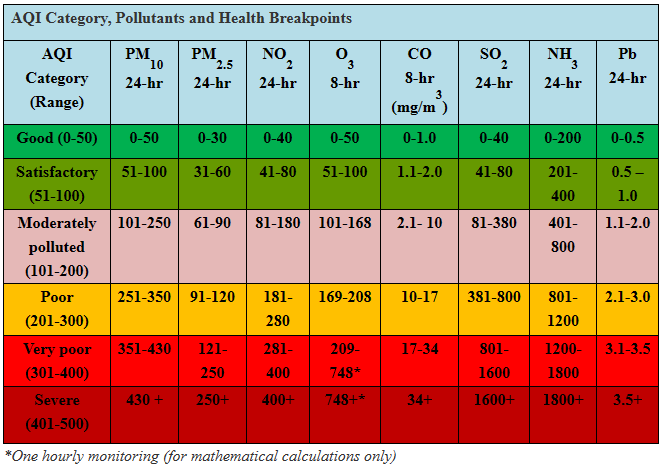

In [102]:
Image('..\Images\Goverment Standarts.png')

#### Conclusion ####

<Ol>
<li> If the Raw data is correct CO (Carbon monoxide) Pollutant with the highest pollution index is considered to express the AQI for the given period. That means Dehli have Severe or Above Severe AIR QUALITY everyday. (Something is not right here, we gonna drop this column in Machiene Learning) </li>
<li> I tried to find out NO (nitrogen monoxide) formula and Index values But I could not find anything. So we will decide later what to do with it. </li>
<li> Rest of The columns Looks Good. Ready for analysis. </li>
<li> We Used O3, Pm2.5 and Pm 10 to Calculate AQI. </li>
</ol>

<style>
h2{color: rgb(0, 163, 204)}
</style>
## Ploting chategorical values to understand and visualize data ##

<style>
h3{color: rgb(102, 102, 153); background-color: rgb(204, 255, 102);}
</style>
### <b> AQI Category Categorical total values</b> ###

In [71]:
Model1['AQI_CATEGORY'].value_counts()

AQI_CATEGORY
Very Poor       5234
Severe          3334
Poor            2168
Moderate        2138
Satisfactory    1296
Good             335
Hazardous         43
Name: count, dtype: int64

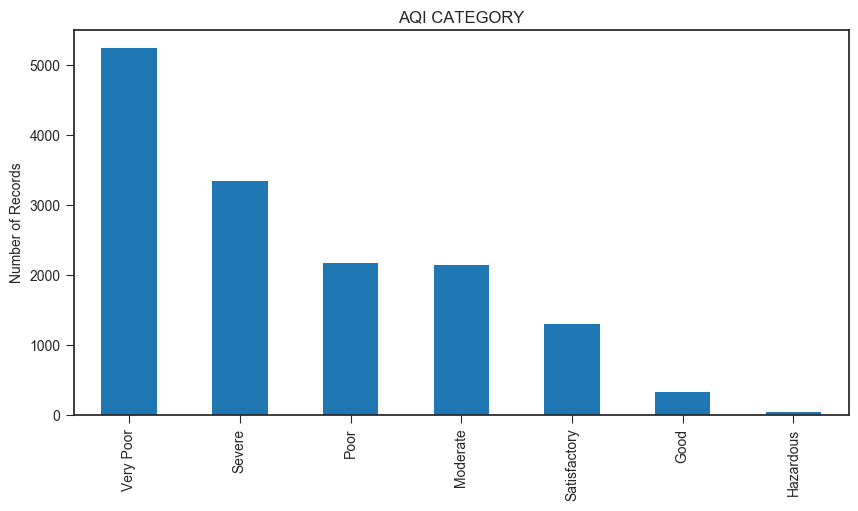

In [72]:
# Visualize AQI Caegory column data

plt.figure(figsize=(10, 5))
plt.style.use('seaborn-v0_8-ticks')
Model1['AQI_CATEGORY'].value_counts().plot(kind='bar')
plt.title('AQI CATEGORY')
plt.ylabel('Number of Records')
plt.xlabel('')
plt.show()

<style>
h2{color: rgb(255, 204, 0); background-color: rgb(102, 102, 153);}
</style>
<h2><b> Comparing columns with AQI. Because our target varible will be <i>"AQI"</i></b></h2>

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### AQI Category wise <i><b>AQI</b></i> vs <b>PM2.5</b> of <b>DEHLI</b> ###

<Figure size 800x1000 with 0 Axes>

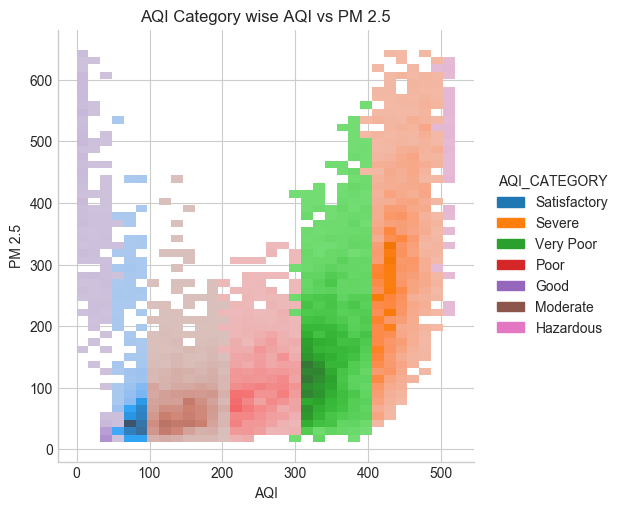

In [104]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='AQI', y='pm2_5', hue='AQI_CATEGORY', legend=True, data=Model1)
plt.title('AQI Category wise AQI vs PM 2.5')
plt.xlabel('AQI')
plt.ylabel('PM 2.5')

plt.show()
plt.close()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### AQI Category wise <i><b>AQI</b></i> vs <b>PM 10</b> of <b>DEHLI</b> ###

<Figure size 800x1000 with 0 Axes>

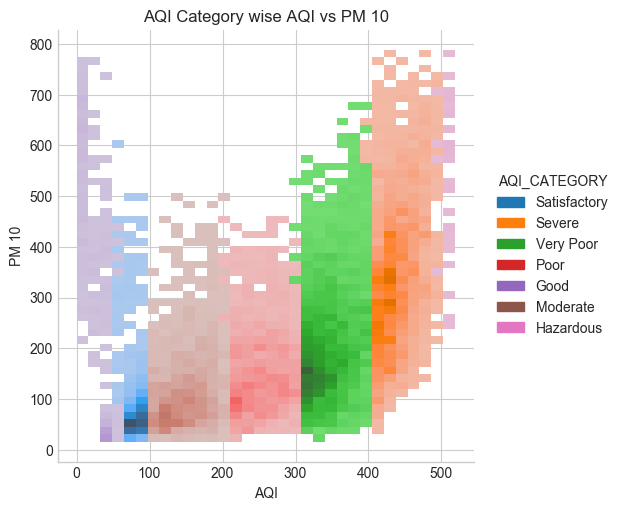

In [108]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='AQI', y='pm10', hue='AQI_CATEGORY', legend=True, data=Model1)
plt.title('AQI Category wise AQI vs PM 10')
plt.xlabel('AQI')
plt.ylabel('PM 10')

plt.show()
plt.close()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### AQI Category wise <i><b>AQI</b></i> vs <b>O3</b> of <b>DEHLI</b> ###

<Figure size 800x1000 with 0 Axes>

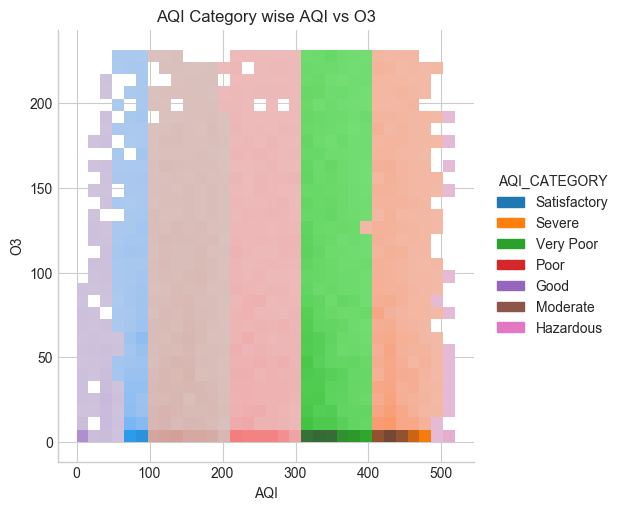

In [111]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='AQI', y='o3', hue='AQI_CATEGORY', legend=True, data=Model1)
plt.title('AQI Category wise AQI vs O3')
plt.xlabel('AQI')
plt.ylabel('O3')

plt.show()
plt.close()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### AQI Category wise <i><b>AQI</b></i> vs <b>CO</b> of <b>DEHLI</b> ###

<Figure size 800x1000 with 0 Axes>

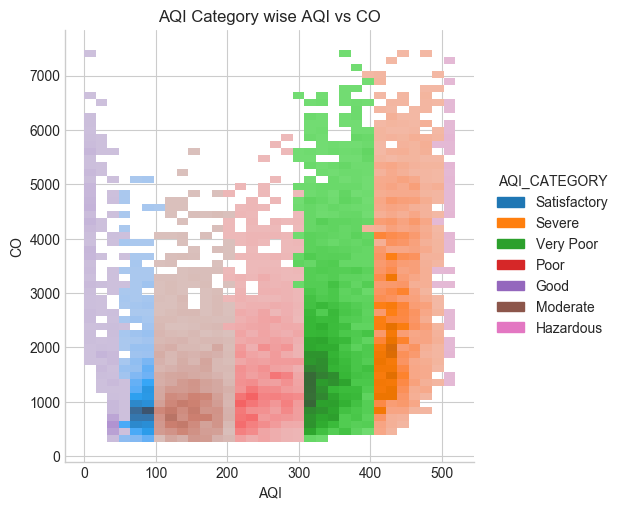

In [112]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='AQI', y='co', hue='AQI_CATEGORY', legend=True, data=Model1)
plt.title('AQI Category wise AQI vs CO')
plt.xlabel('AQI')
plt.ylabel('CO')

plt.show()
plt.close()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### AQI Category wise <i><b>AQI</b></i> vs <b>NO</b> of <b>DEHLI</b> ###

<Figure size 800x1000 with 0 Axes>

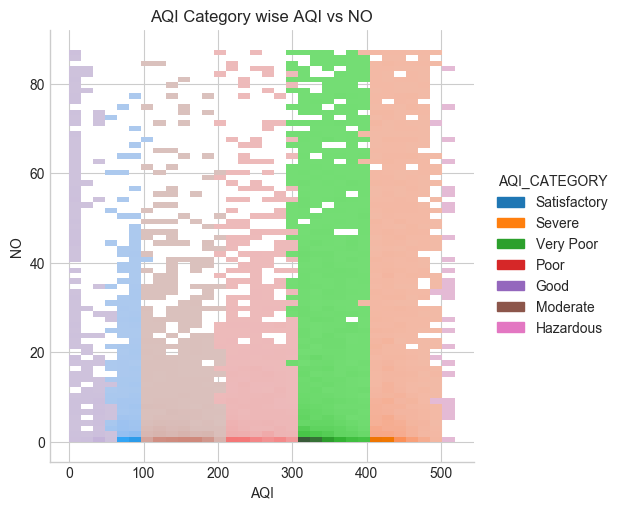

In [115]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='AQI', y='no', hue='AQI_CATEGORY', legend=True, data=Model1)
plt.title('AQI Category wise AQI vs NO')
plt.xlabel('AQI')
plt.ylabel('NO')

plt.show()
plt.close()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### AQI Category wise <i><b>AQI</b></i> vs <b>NO2</b> of <b>DEHLI</b> ###

<Figure size 800x1000 with 0 Axes>

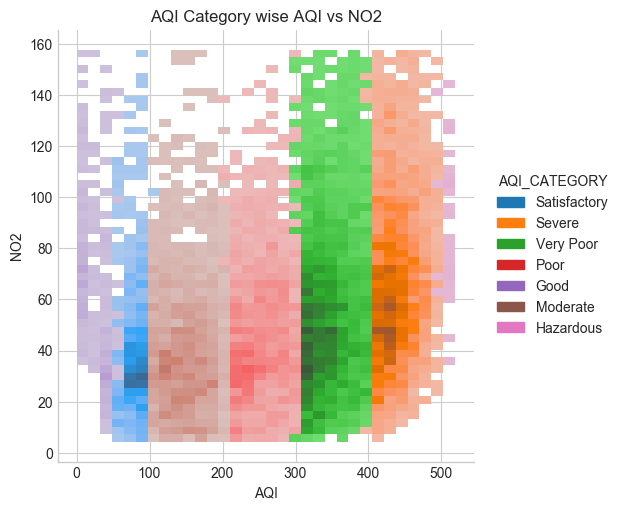

In [116]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='AQI', y='no2', hue='AQI_CATEGORY', legend=True, data=Model1)
plt.title('AQI Category wise AQI vs NO2')
plt.xlabel('AQI')
plt.ylabel('NO2')

plt.show()
plt.close()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### AQI Category wise <i><b>AQI</b></i> vs <b>SO2</b> of <b>DEHLI</b> ###

<Figure size 800x1000 with 0 Axes>

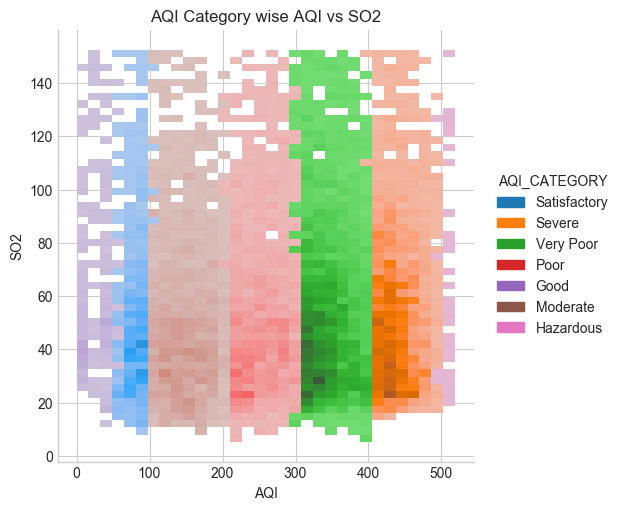

In [118]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='AQI', y='so2', hue='AQI_CATEGORY', legend=True, data=Model1)
plt.title('AQI Category wise AQI vs SO2')
plt.xlabel('AQI')
plt.ylabel('SO2')

plt.show()
plt.close()

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### AQI Category wise <i><b>AQI</b></i> vs <b>NH3</b> of <b>DEHLI</b> ###

<Figure size 800x1000 with 0 Axes>

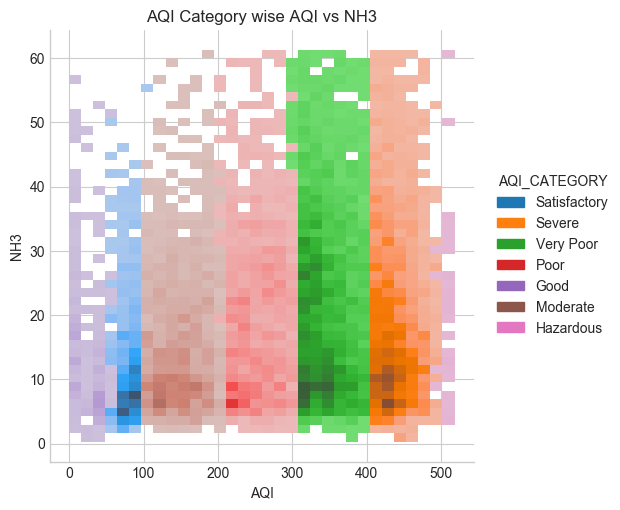

In [119]:
plt.figure(figsize=(8,10))
plt.style.use('seaborn-v0_8-whitegrid')
sns.displot(x='AQI', y='nh3', hue='AQI_CATEGORY', legend=True, data=Model1)
plt.title('AQI Category wise AQI vs NH3')
plt.xlabel('AQI')
plt.ylabel('NH3')

plt.show()
plt.close()

### Conclusion ###

<ol>
"PM 2.5, PM 10 and CO chart are showing good relation with AQI and AQI Category. Let's verify it.
</ol>

<Figure size 2000x2500 with 0 Axes>

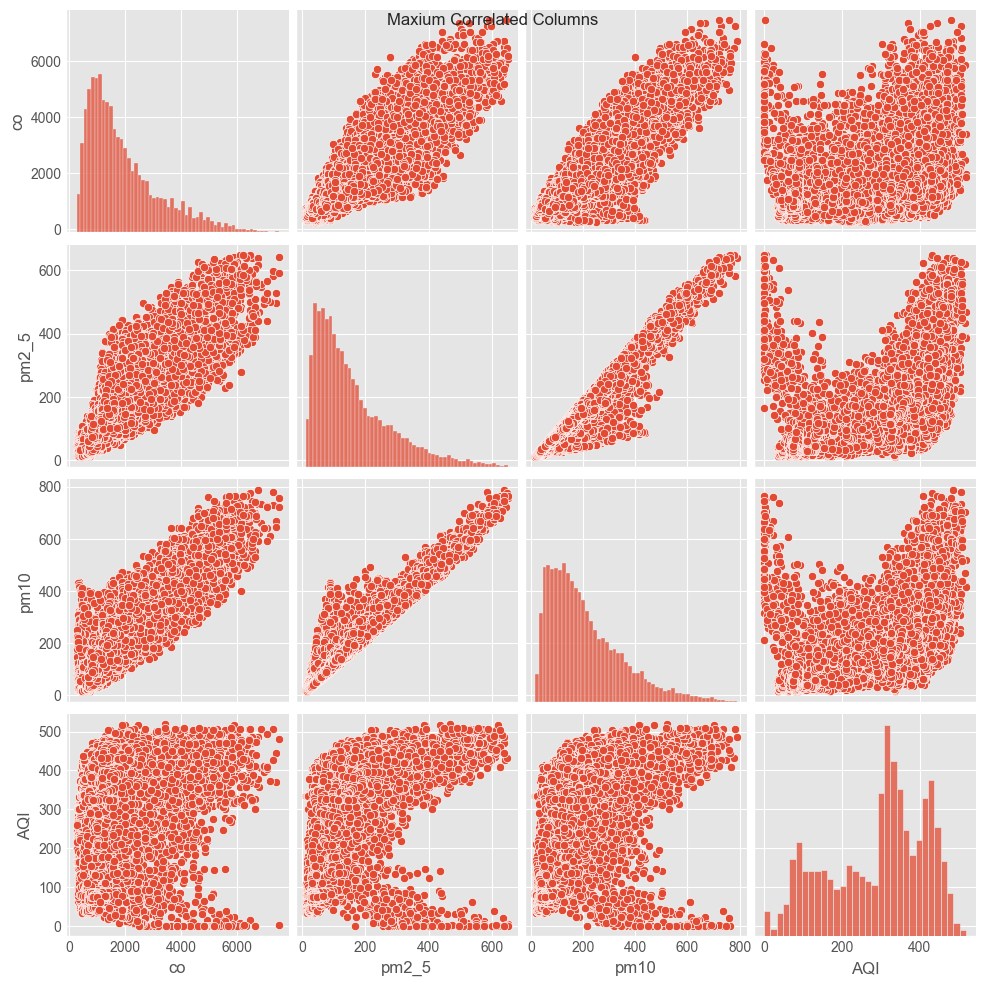

In [122]:
plt.figure(figsize=(20, 25))
plt.style.use('ggplot')
sns.pairplot(Model1[['co', 'pm2_5', 'pm10', 'AQI', 'AQI_CATEGORY']], kind='scatter')
plt.suptitle('Maxium Correlated Columns')

plt.show()
plt.close()

### Ready For Machiene Learning ###

In [74]:
# Dropping AQI Category and CO #
Model1.replace({'AQI_CATEGORY' : {'Good' : 1, 'Satisfactory' : 2, 'Moderate' : 3,
                                  'Poor' : 4, 'Very Poor' : 5, 'Severe' : 6, 'Hazardous' : 7}}, inplace=True)

<style>
h2{color: rgb(255, 102, 0)}
</style>
## <b> Correlation Of all Coloumns in "Model 1" </b> ##

<style>
h3{color: rgb(204, 122, 0); background-color: rgb(179, 204, 204);}
</style>
### <b> Correlation Chart </b> ###

In [75]:
Model1.corr().style.background_gradient(cmap='BuPu')

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,AQI,AQI_CATEGORY
date,1.000000,-0.004521,0.010945,-0.000495,-0.045399,-0.026477,-0.030279,-0.029288,-0.035096,-0.025375,-0.034620
co,-0.004521,1.000000,0.792423,0.768823,-0.494056,0.287723,0.857991,0.871951,0.603487,0.404219,0.371003
no,0.010945,0.792423,1.000000,0.430680,-0.416094,0.238384,0.612793,0.632392,0.380013,0.219582,0.195645
no2,-0.000495,0.768823,0.430680,1.000000,-0.410191,0.581671,0.590671,0.604861,0.629617,0.277265,0.254146
o3,-0.045399,-0.494056,-0.416094,-0.410191,1.000000,0.032690,-0.296979,-0.298156,-0.254945,-0.019693,-0.009752
so2,-0.026477,0.287723,0.238384,0.581671,0.032690,1.000000,0.180572,0.171588,0.324290,0.024453,0.014331
pm2_5,-0.030279,0.857991,0.612793,0.590671,-0.296979,0.180572,1.000000,0.965335,0.335522,0.527864,0.477612
pm10,-0.029288,0.871951,0.632392,0.604861,-0.298156,0.171588,0.965335,1.000000,0.427522,0.505632,0.460883
nh3,-0.035096,0.603487,0.380013,0.629617,-0.254945,0.324290,0.335522,0.427522,1.000000,0.177692,0.185126
AQI,-0.025375,0.404219,0.219582,0.277265,-0.019693,0.024453,0.527864,0.505632,0.177692,1.000000,0.975987


In [76]:
feature = Model1.drop(['AQI', 'co', 'date'], axis=1)
target = Model1['AQI']

In [77]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.30, random_state=0, shuffle=False)

In [78]:
print('Training \"x_train\" Data Shape is : ', x_train.shape)
print('Training \"y_train\" Data Shape is : ', y_train.shape)
print('Training \"x_test\" Data Shape is : ', x_test.shape)
print('Training \"y_test\" Data Shape is : ', x_test.shape)

Training "x_train" Data Shape is :  (10183, 8)
Training "y_train" Data Shape is :  (10183,)
Training "x_test" Data Shape is :  (4365, 8)
Training "y_test" Data Shape is :  (4365, 8)


In [79]:
# Define the Model
Air_Quality_Model = LinearRegression()

In [80]:
# Fitting the model in Traing Data
Air_Quality_Model.fit(x_train, y_train) 

LinearRegression()

In [81]:
m = Air_Quality_Model.coef_           
c = Air_Quality_Model.intercept_

In [82]:
# Printing m and c
print('\"M\" of the Model is : ', m)
print('\n')
print('\"C\" of the Model is : ', c)

"M" of the Model is :  [-2.75240502e-02  9.10720525e-02  3.33166114e-02 -3.37492070e-02
  9.90772647e-02 -1.04700645e-02 -3.06900474e-01  8.66050221e+01]


"C" of the Model is :  -107.11760097686317


In [83]:
# Predicting Traning Data using our Linear Model 1
y_prediction_train = Air_Quality_Model.predict(x_train)

In [84]:
# Predicting Testing Data using our Linear Model 1
y_prediction_test = Air_Quality_Model.predict(x_test)

In [85]:
print('Mean Squared error of our Traning Data : ', mean_squared_error(y_train, y_prediction_train))
print('Mean Squared error of our Testing Data : ', mean_squared_error(y_test, y_prediction_test))

Mean Squared error of our Traning Data :  639.2192675093381
Mean Squared error of our Testing Data :  648.9628166437892


In [86]:
print('Mean Absolute error of our Traning Data : ', mean_absolute_error(y_train, y_prediction_train))
print('Mean Absolute error of our Testing Data : ', mean_absolute_error(y_test, y_prediction_test))

Mean Absolute error of our Traning Data :  20.944278739739666
Mean Absolute error of our Testing Data :  20.696497816952448


In [87]:
train_accuracy = r2_score(y_train, y_prediction_train)
print(f'The model training is accurate of {train_accuracy*100:.2f}% .')

The model training is accurate of 95.21% .


In [88]:
test_accuracy = r2_score(y_test, y_prediction_test)
print(f'The model testing is accurate of {test_accuracy*100:.2f}% .')

The model testing is accurate of 96.68% .


In [89]:
y_test.iloc[50:75]

13422    238.139583
13423    235.600417
13424    233.280000
13425    231.022500
13426    228.335833
13427    225.231250
13428    222.352083
13429    220.954167
13433    239.289957
13434    237.193319
13435    233.894741
13436    230.655905
13437    228.738491
13438    228.842328
13439    230.749784
13440    232.361379
13441    231.924698
13442    229.496638
13443    226.774138
13444    224.801250
13445    223.548103
13446    223.329052
13447    223.034612
13448    222.060259
13449    220.211121
Name: AQI, dtype: float64

In [90]:
y_prediction_test[50:75]

array([245.28120077, 245.51048741, 245.59032004, 245.60055079,
       245.71137307, 245.66082797, 245.99297674, 244.01416456,
       245.44198044, 242.35286149, 240.56283111, 240.0514061 ,
       239.83624125, 239.64272413, 239.67149075, 239.88944793,
       239.75787282, 240.58341282, 242.06347705, 243.56299969,
       244.64291326, 244.13401821, 243.90984372, 243.91057427,
       244.03230999])

In [91]:
y_test.tail()

18771    427.75596
18772    429.27286
18773    431.09358
18774    432.13792
18775    432.35264
Name: AQI, dtype: float64

In [92]:
y_prediction_test[-5:]

array([433.77628147, 432.46329128, 433.43511009, 428.18692948,
       425.49420683])